# 第6章 k平均法：教師なし学習モデルの基礎

## 6.1 k平均法によるクラスタリングと応用例

**[06KM-01]**

必要なモジュールをインポートします。

特に、画像データを扱うためにPILモジュールを利用します。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randint
from PIL import Image

**[06KM-02]**

画像ファイル「photo.jpg」をダウンロードします。

In [2]:
!curl -OL https://github.com/enakai00/colab_mlbook/raw/main/photo.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   136  100   136    0     0   1837      0 --:--:-- --:--:-- --:--:--  1837
100 47187  100 47187    0     0   430k      0 --:--:-- --:--:-- --:--:--  430k


**[06KM-03]**

画像ファイル「photo.jpg」を読み込んで表示します。

白、赤、緑の3色を中心に構成された画像です。

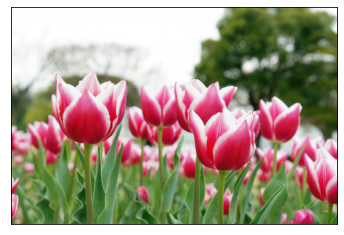

In [3]:
im = Image.open("photo.jpg")

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-04]**

画像データを各ピクセルの (R,G,B) を並べたリストに変換して、確認のためにリストの先頭部分を表示します。

In [4]:
pixels = list(im.convert('RGB').getdata())
pixels[:10]

[(251, 253, 252),
 (250, 252, 251),
 (250, 252, 251),
 (250, 252, 251),
 (251, 253, 252),
 (252, 254, 253),
 (253, 255, 254),
 (255, 255, 255),
 (254, 254, 254),
 (254, 254, 254)]

**[06KM-05]**

k平均法で「代表色」を決定する関数を用意します。

$k$ 個の代表色を決定して、各ピクセルを代表色に置き換えたリストを返します。

In [5]:
def run_kmeans(pixels, k):
  print('Number of clusters: {}'.format(k))
  cls = [0] * len(pixels)

  # 代表色の初期値をランダムに設定
  centers = randint(256, size=(k, 3))
  print('Initial centers:')
  for c in centers:
    print('({:.2f}, {:.2f}, {:.2f})'.format(*c), end=' ')
  print('\n========================')
  distortion = float('inf')

  # 最大50回のIterationを実施
  for _ in range(50): 
    centers_new = np.zeros((k, 3))
    num_points = [0] * k
    distortion_new = 0.0

    # E Phase: 各データが属するグループ（代表色）を計算
    for pix, point in enumerate(pixels):
      point = np.array(point)
      dists = [np.dot(d, d) for d in centers - point]
      cls[pix] = np.argmin(dists)
      centers_new[cls[pix]] += point
      num_points[cls[pix]] += 1
      distortion_new += dists[cls[pix]]

    # M Phase: 新しい代表色を計算
    for i in range(k):
      if num_points[i] == 0:
        centers_new[i] = np.array([0, 0, 0])
      else:
        centers_new[i] = centers_new[i] / num_points[i]
    centers = centers_new
    for c in centers:
      print('({:.2f}, {:.2f}, {:.2f})'.format(*c), end=' ')
    print('\nDistortion: J={:.2f}'.format(distortion_new))

    # Distortion(J)の変化が0.1%未満になったら終了
    if distortion - distortion_new < distortion * 0.001:
        break
    distortion = distortion_new

  # 画像データの各ピクセルを代表色で置き換え
  new_pixels = []
  for pix in range(len(pixels)):
    new_pixels.append(tuple(centers[cls[pix]]))

  print("Done.")
  return list(map(lambda x: (int(x[0]), int(x[1]), int(x[2])), new_pixels))

**[06KM-06]**

例として、2つのクラスターに分類します。

In [6]:
result = run_kmeans(pixels, 2)

Number of clusters: 2
Initial centers:
(224.00, 123.00, 115.00) (207.00, 254.00, 11.00) 
(160.33, 144.59, 126.31) (99.58, 145.32, 23.53) 
Distortion: J=4104438515.00
(210.69, 178.09, 179.60) (83.92, 93.80, 45.47) 
Distortion: J=2440561215.04
(226.65, 202.90, 207.34) (102.48, 93.76, 55.64) 
Distortion: J=1194511883.85
(232.29, 213.92, 218.53) (109.42, 95.56, 61.08) 
Distortion: J=944140226.52
(233.98, 218.04, 222.34) (111.97, 96.38, 63.26) 
Distortion: J=904446204.56
(234.55, 219.47, 223.64) (112.85, 96.71, 64.06) 
Distortion: J=899375134.52
(234.74, 219.96, 224.07) (113.15, 96.83, 64.34) 
Distortion: J=898771642.48
Done.


**[06KM-07]**

結果を画像として表示します。

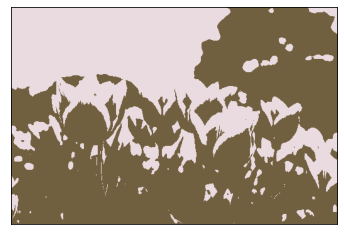

In [7]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-08]**

同様に、3つのクラスターに分類します。

In [8]:
result = run_kmeans(pixels, 3)

Number of clusters: 3
Initial centers:
(183.00, 82.00, 205.00) (35.00, 10.00, 188.00) (211.00, 99.00, 119.00) 
(239.14, 232.56, 234.90) (41.79, 68.05, 27.00) (137.83, 108.25, 82.40) 
Distortion: J=3620550071.00
(237.32, 226.81, 229.97) (56.91, 79.95, 31.97) (144.42, 107.21, 84.88) 
Distortion: J=665655938.14
(237.15, 226.58, 229.72) (63.93, 86.23, 36.00) (151.22, 106.58, 88.97) 
Distortion: J=630042630.32
(237.36, 227.33, 230.30) (68.40, 90.54, 39.24) (157.47, 105.61, 92.68) 
Distortion: J=613511999.27
(237.58, 228.10, 230.91) (71.72, 93.81, 41.97) (163.13, 104.28, 95.78) 
Distortion: J=602377213.92
(237.75, 228.67, 231.36) (74.29, 96.33, 44.21) (168.01, 102.68, 98.19) 
Distortion: J=594550525.79
(237.85, 229.09, 231.67) (76.26, 98.37, 46.08) (172.17, 100.85, 99.95) 
Distortion: J=589221996.26
(237.90, 229.37, 231.86) (77.73, 100.02, 47.59) (175.52, 98.93, 101.08) 
Distortion: J=585609148.32
(237.90, 229.53, 231.96) (78.92, 101.46, 48.87) (178.33, 96.85, 101.80) 
Distortion: J=58322144

**[06KM-09]**

結果を画像として表示します。

「白、赤、緑」が抽出されていることがわかります。

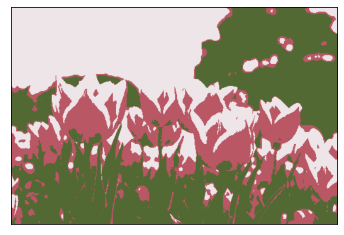

In [9]:
im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-10]**

次は、8個のクラスターに分類して、結果を表示します。

Number of clusters: 8
Initial centers:
(122.00, 149.00, 37.00) (101.00, 125.00, 235.00) (229.00, 63.00, 109.00) (178.00, 199.00, 57.00) (147.00, 124.00, 140.00) (213.00, 152.00, 106.00) (229.00, 218.00, 61.00) (67.00, 135.00, 30.00) 
(112.97, 131.23, 69.35) (189.50, 232.50, 227.00) (195.17, 44.03, 79.41) (152.07, 170.69, 95.46) (142.51, 152.17, 123.84) (236.65, 221.67, 225.06) (0.00, 0.00, 0.00) (63.76, 90.85, 39.48) 
Distortion: J=1945925110.00
(104.88, 129.92, 70.42) (195.69, 201.70, 194.40) (191.83, 43.12, 76.33) (148.64, 161.88, 98.36) (167.14, 147.90, 136.01) (242.37, 231.59, 235.54) (20.80, 44.78, 13.68) (60.37, 86.23, 35.24) 
Distortion: J=329355190.67
(101.56, 128.19, 68.72) (214.10, 186.62, 193.76) (188.45, 37.92, 69.85) (135.27, 154.05, 102.94) (193.99, 135.29, 144.71) (245.80, 243.33, 244.36) (29.49, 55.22, 18.03) (63.66, 88.95, 36.54) 
Distortion: J=223003459.79
(99.96, 126.73, 66.10) (215.97, 190.66, 197.43) (184.64, 33.35, 63.62) (133.37, 151.73, 105.64) (208.31, 122.69, 

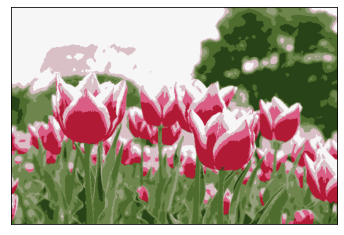

In [10]:
result = run_kmeans(pixels, 8)

im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)

**[06KM-11]**

最後に16個のクラスターに分類して、結果を表示します。

Number of clusters: 16
Initial centers:
(201.00, 234.00, 189.00) (255.00, 207.00, 182.00) (38.00, 241.00, 61.00) (93.00, 206.00, 204.00) (164.00, 87.00, 105.00) (129.00, 128.00, 246.00) (160.00, 140.00, 230.00) (5.00, 6.00, 250.00) (245.00, 145.00, 114.00) (36.00, 99.00, 196.00) (223.00, 32.00, 131.00) (216.00, 132.00, 180.00) (20.00, 112.00, 191.00) (42.00, 120.00, 149.00) (51.00, 224.00, 135.00) (105.00, 42.00, 126.00) 
(227.26, 229.25, 226.24) (248.77, 237.96, 242.27) (71.67, 128.59, 22.32) (136.74, 174.72, 135.29) (126.29, 113.42, 71.85) (0.00, 0.00, 0.00) (156.11, 170.07, 166.67) (0.00, 0.00, 0.00) (200.53, 142.59, 123.91) (0.00, 0.00, 0.00) (210.66, 41.87, 87.75) (212.36, 142.20, 164.34) (0.00, 0.00, 0.00) (74.76, 121.69, 62.67) (120.21, 171.56, 112.24) (55.42, 69.00, 30.82) 
Distortion: J=1236548292.00
(224.48, 213.82, 216.96) (250.30, 250.01, 250.19) (81.14, 113.92, 30.77) (148.05, 163.37, 128.31) (121.29, 125.07, 72.45) (14.77, 37.30, 10.75) (176.37, 182.40, 169.09) (0.00, 0.0

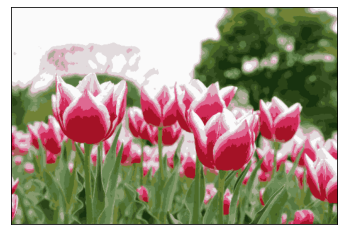

In [11]:
result = run_kmeans(pixels, 16)

im.putdata(result)
fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
subplot.set_xticks([])
subplot.set_yticks([])
_ = subplot.imshow(im)